In [1]:
import networkx as nx
import matplotlib.pyplot as plt  

import pandas as pd
import numpy as np
from scipy import sparse

In [2]:
g=nx.Graph()

In [3]:
p = pd.read_csv("Data/SiouxFalls/SiouxFalls_node.csv", header = 0)
p.head()

,Node,X,Y,;
0,1,50000,510000,;
1,2,320000,510000,;
2,3,50000,440000,;
3,4,130000,440000,;
4,5,220000,440000,;


In [4]:
l=pd.read_csv("Data/SiouxFalls/SiouxFalls_flow.csv", header = 0)
l.head()

,From,To,Volume,Capacity,Cost
0,1,2,4494.657646,6.000816,NaN
1,1,3,8119.079948,4.008691,NaN
2,2,1,4519.079948,6.000834,NaN
3,2,6,5967.336396,6.573598,NaN
4,3,1,8094.657646,4.008587,NaN


In [5]:
fu=pd.read_csv("Data/results_SF.csv", header = 0) # for UE
f=pd.read_csv("results_so.csv", header = 0) # for SO
f.head()

,index,flow
0,0,7620.034017
1,1,11239.633520
2,2,7639.633519
3,3,6620.034017
4,4,11220.034020


In [ ]:
#g.add_nodes_from(p.Node)

In [6]:
for i in p.Node:
    g.add_node(i,pos=(p.X[i-1],p.Y[i-1]))

In [7]:
for i in l.index:
#    g.add_edge(l.From[i],l.To[i],weight=(fu.flow[i]-f.flow[i])/1000)
     g.add_edge(l.From[i],l.To[i],weight=(fu.flow[i])/1000)

In [8]:
pos=nx.get_node_attributes(g,'pos')

In [9]:
edgewidth = [ d['weight'] for (u,v,d) in g.edges(data=True)]

In [10]:
nx.draw(g,pos, width=edgewidth)

C:\Users\dvignon1\AppData\Local\Continuum\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:126: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  b = plt.ishold()
C:\Users\dvignon1\AppData\Local\Continuum\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:138: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  plt.hold(b)
C:\Users\dvignon1\AppData\Local\Continuum\Anaconda3\lib\site-packages\matplotlib\__init__.py:917: UserWarning: axes.hold is deprecated. Please remove it from your matplotlibrc and/or style files.
  warnings.warn(self.msg_depr_set % key)
C:\Users\dvignon1\AppData\Local\Continuum\Anaconda3\lib\site-packages\matplotlib\rcsetup.py:152: UserWarning: 

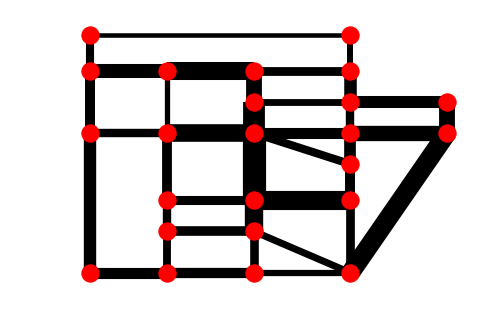

In [11]:
plt.show()

In [44]:
plt.savefig('SiouxFalls_SO.jpg')